In [2]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


we check the data information using the info() command, which provides details about the data types of each column.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Checking for Missing Values
We checked the dataset and found no missing values. If there were any, we would handle them in two ways:

Remove the rows with missing data.

Impute the missing values with the mean, median, or mode depending on the data type.For numerical data, we would use the mean or median, and for categorical data, we would use the mode. This helps ensure that the dataset is ready for model training

In [4]:
missing_value=df.isnull().sum()
percentage_missing_value=missing_value/ len(df) * 100 
pd.DataFrame({'missing_value':missing_value,'percentage_missing_value':percentage_missing_value})

,missing_value,percentage_missing_value
Time,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0
V9,0,0.0


## Handling duplicates
we observe that there are 1,081 duplicate rows, so we will drop them from the dataset.

In [5]:

duplicate_values = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_values}')

df = df.drop_duplicates()
print(f'Number of rows after dropping duplicates: {df.shape[0]}')

Number of duplicate rows: 1081
Number of rows after dropping duplicates: 283726


## Encoding Categorical Data
Since there are no categorical columns in this dataset, we can skip the encoding step.

## Checking Dataset is Balanced or Imbalanced
The dataset is highly imbalanced with 99.83% normal transactions and 0.17% fraudulent transactions. This imbalance could affect model performance

In [6]:
classes=df['Class'].value_counts()
print(f'normal_trans ={classes[0]}')
print(f'fraud_trans ={classes[1]}')
print(f'percentage_normal_trans ={(classes[0] / df["Class"].count())*100:.2f}%')
print(f'percentage_fraud_trans ={(classes[1] / df["Class"].count())*100:.2f}%')

normal_trans =283253
fraud_trans =473
percentage_normal_trans =99.83%
percentage_fraud_trans =0.17%


In [9]:
!pip install matplotlib seaborn


     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     ------------------------- ----------- 71.7/104.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 104.0/104.0 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.1 MB 7.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/8.1 MB 5.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/8.1 MB 4.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/8.1 MB 4.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.1 MB 2.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.1 MB 3.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/8.1 MB 3.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/8.1 MB 3.6 MB/s eta 0:00:02
   ------- -----


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


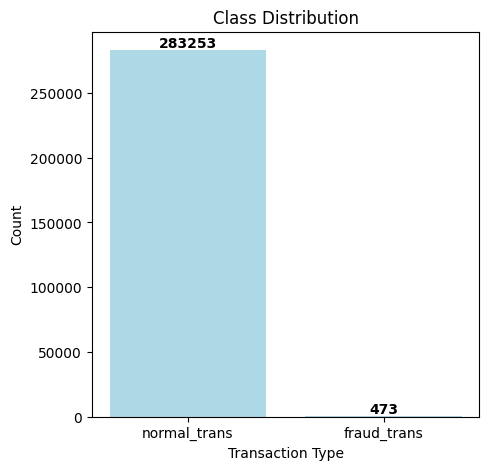

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
title=['normal_trans','fraud_trans']
value=[classes[0],classes[1]]
plt.figure(figsize=(5, 5))
bars = plt.bar(title, value, color='lightblue')
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20,  
             str(int(yval)),  
             ha='center', va='bottom', fontweight='bold') 
plt.title('Class Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

## Exploratory Data Analysis (EDA)

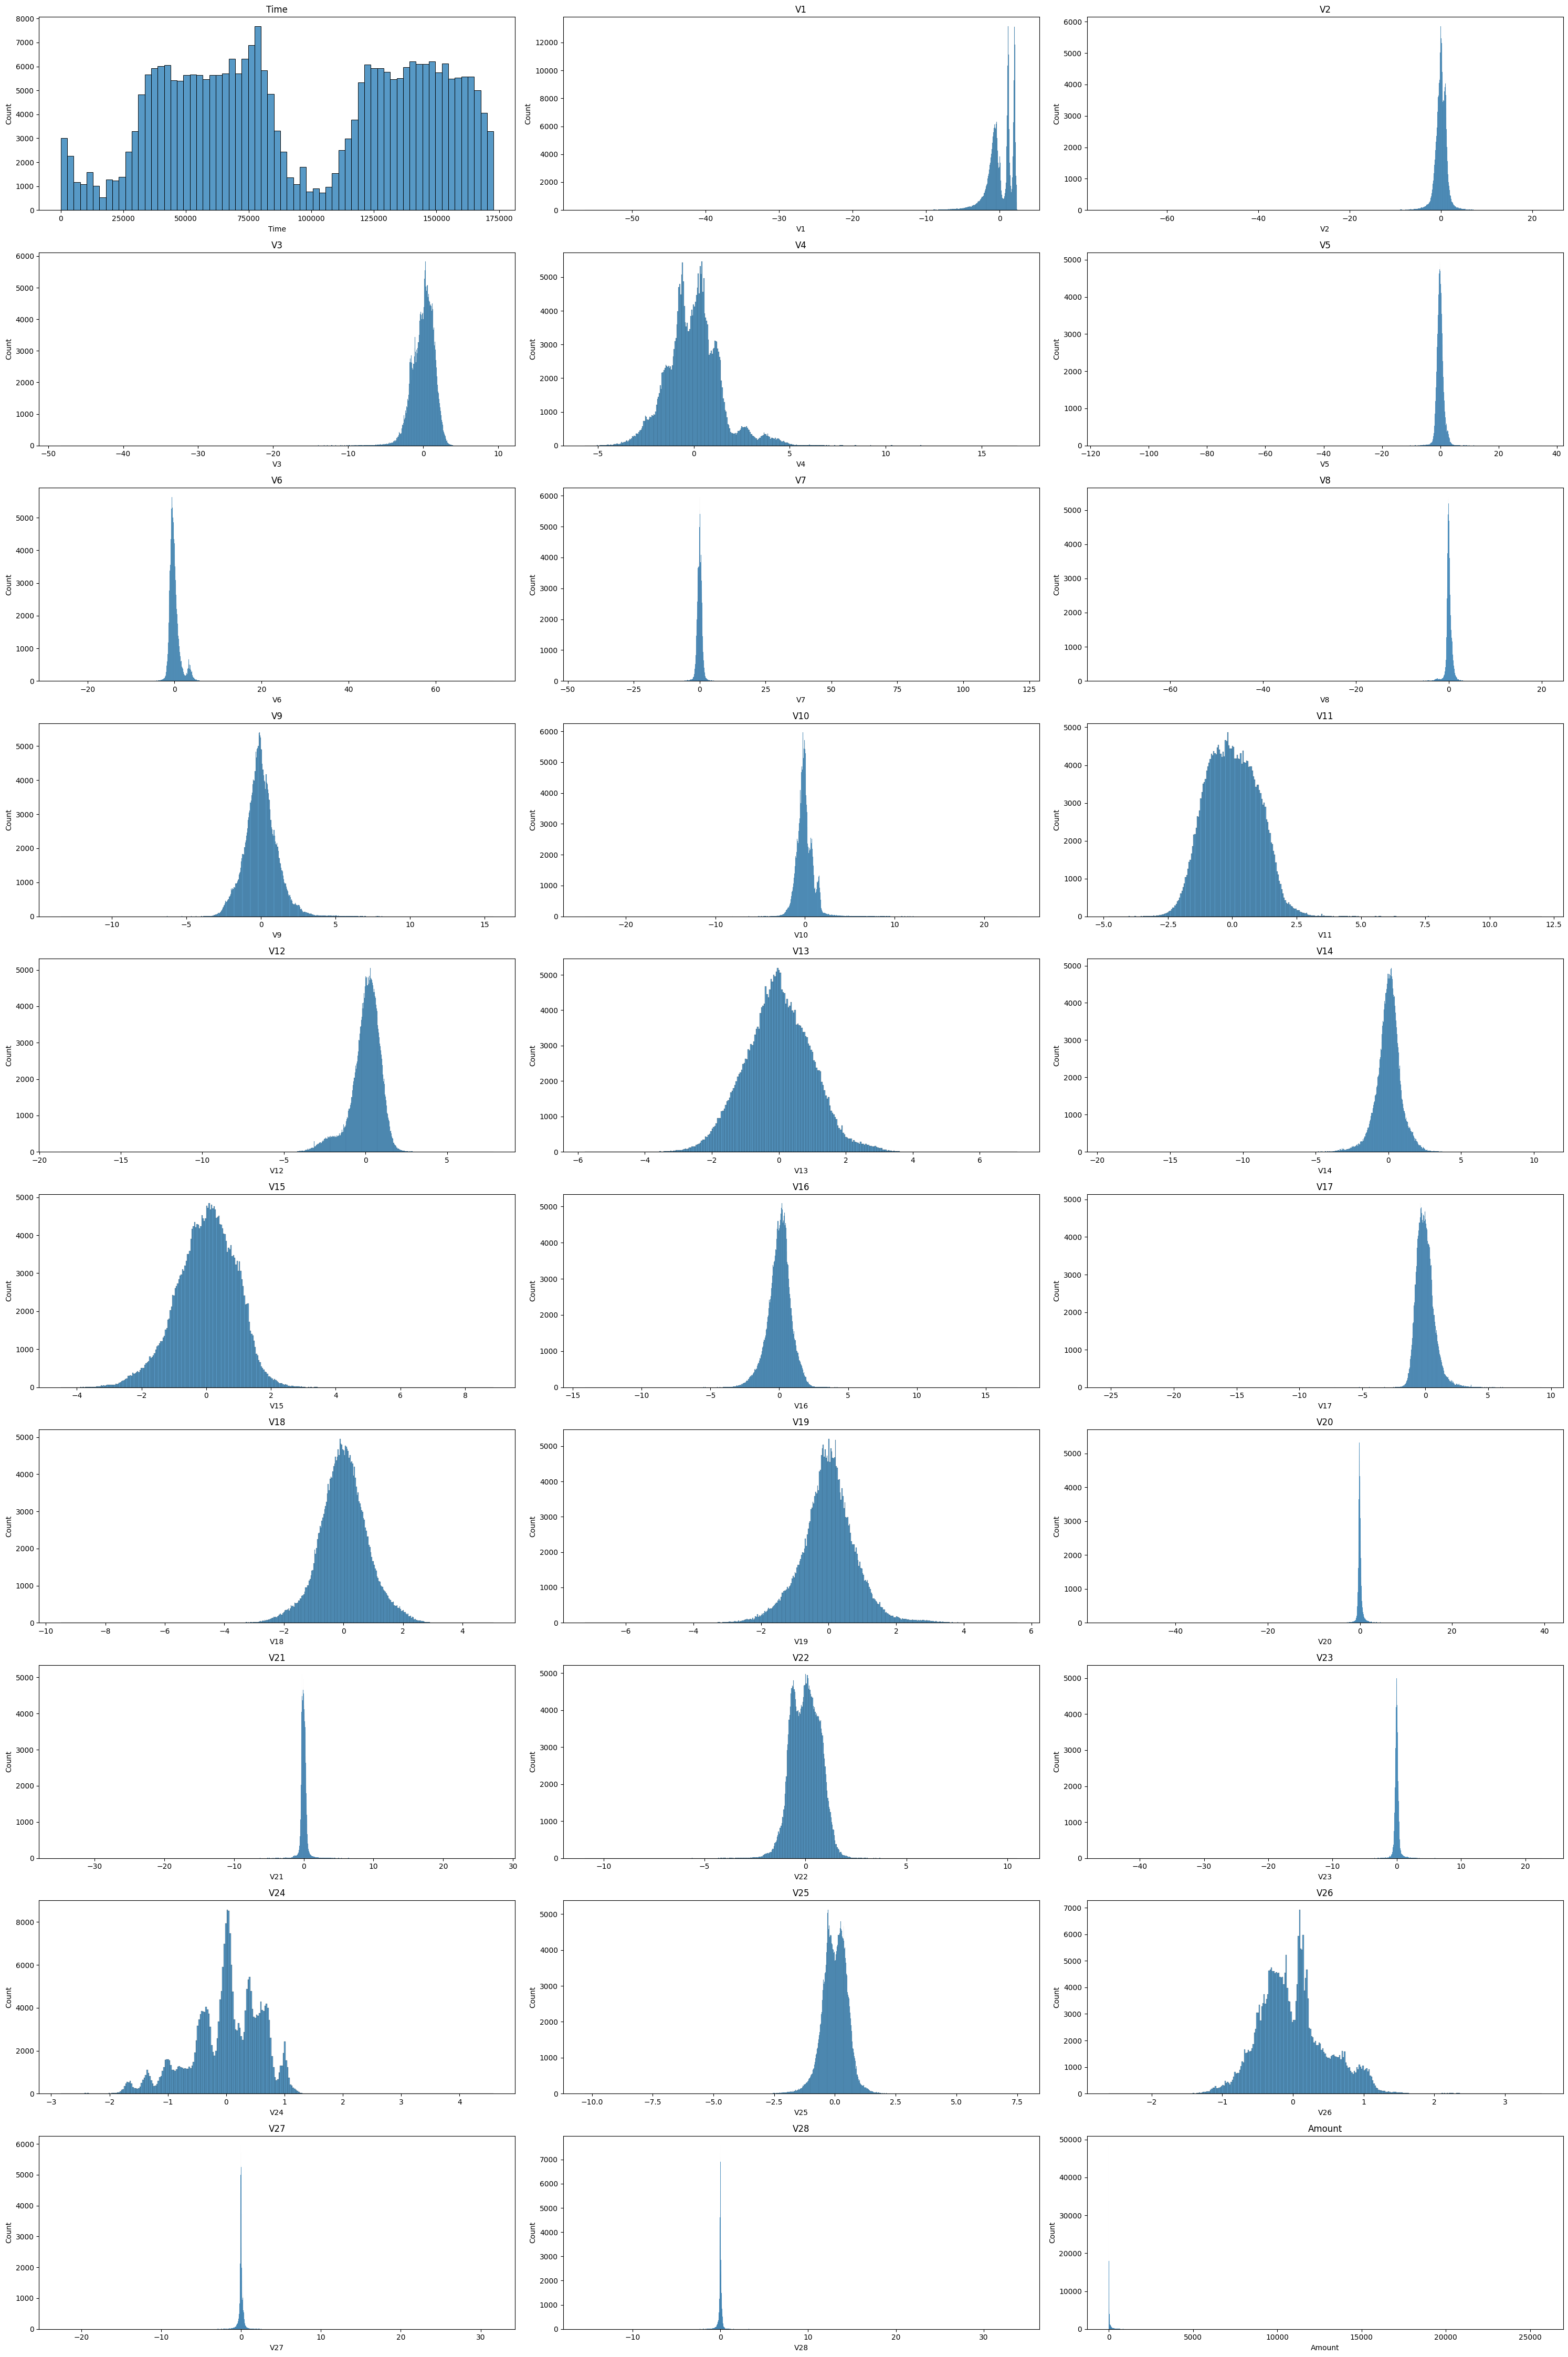

In [11]:
x = df.drop('Class', axis=1)#features
y=df['Class']#target
var=x.columns
fig, axes = plt.subplots(10, 3, figsize=(30, 45))  
axes = axes.flatten()  

for i, ax in enumerate(axes):
    sns.histplot(x[var[i]], ax=ax)  
    ax.set_title(var[i])  

plt.tight_layout()  
plt.show()
    

## Skewness
When plotting the features, we observe that not all of them follow a normal distribution. To assess the skewness, we will use the skew() function. If any feature has a skew value, we will apply a PowerTransformer, which helps reduce skewness and transforms the data to follow a more normal distribution.

In [12]:
skewness=x.skew()
skew=[]
for i in var:
  skew.append(x[i].skew())
skew_df = pd.DataFrame({'Features': var, 'Skewness': skew})
print(skew_df)

   Features   Skewness
0      Time  -0.035581
1        V1  -3.273271
2        V2  -4.695162
3        V3  -2.151984
4        V4   0.671504
5        V5  -2.414079
6        V6   1.829880
7        V7   2.890271
8        V8  -8.310970
9        V9   0.537663
10      V10   1.252967
11      V11   0.344074
12      V12  -2.199008
13      V13   0.064293
14      V14  -1.918804
15      V15  -0.309659
16      V16  -1.051161
17      V17  -3.690497
18      V18  -0.248661
19      V19   0.108312
20      V20  -2.043121
21      V21   2.820033
22      V22  -0.182330
23      V23  -5.867221
24      V24  -0.552129
25      V25  -0.415744
26      V26   0.580292
27      V27  -0.753804
28      V28  11.555115
29   Amount  16.978803


In [14]:
!pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.8 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 647.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.3/11.1 MB 4.3 MB/s eta 0:00:03
   - -------------------------------------- 0.5/11.1 MB 4.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/11.1 MB 3.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/11.1 MB 3.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/11.1 MB 3.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/11.1 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/11.1 MB 3.7 MB/s eta 0:00:03
   ----- 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
from sklearn.preprocessing import PowerTransformer
skewed_columns = skew_df.loc[abs(skew_df['Skewness']) > 1, 'Features']
print("Highly skewed columns:", list(skewed_columns))
pt = PowerTransformer(method='yeo-johnson', copy=False) 
x[skewed_columns] = pt.fit_transform(x[skewed_columns])

Highly skewed columns: ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V28', 'Amount']


## Scatter Plot
A scatter plot is a visualization that displays the relationship between two variables by plotting data points on a Cartesian plane. It helps in checking linearity, identifying patterns, and detecting outliers in the data.

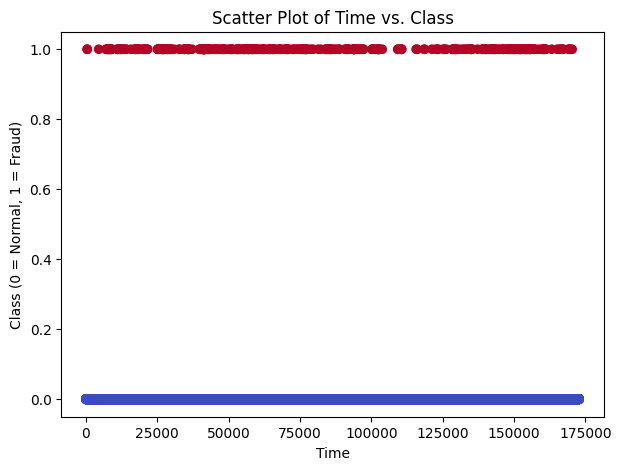

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(x['Time'],y,c=y,cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Class (0 = Normal, 1 = Fraud)')
plt.title('Scatter Plot of Time vs. Class')
plt.show()

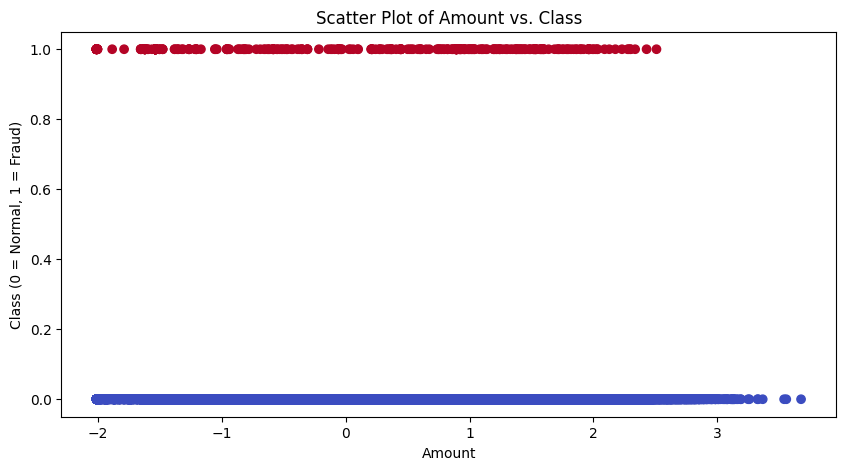

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(x['Amount'],y,c=y,cmap='coolwarm')
plt.xlabel('Amount')
plt.ylabel('Class (0 = Normal, 1 = Fraud)')
plt.title('Scatter Plot of Amount vs. Class')
plt.show()

## Outliers
In this dataset, there may be instances where the card is used for high-value transactions, which is why we cannot simply remove outliers.

# Normalization
We see that in this dataset, only the "amount" feature has a different range of values. That's why I used RobustScaler. It is used when we don't want to remove outliers, as it scales the data based on the median and the interquartile range, making it less sensitive to extreme values.

In [18]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x[['Amount']]=scaler.fit_transform(x[['Amount']])
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-0.908517,-0.131109,2.174201,1.378155,-0.257317,0.460075,0.195593,0.022528,0.363787,...,0.323745,-0.009113,0.277838,-0.190040,0.066928,0.128539,-0.189115,0.133558,-0.055175,0.727319
1,0.0,0.625754,0.094915,-0.033947,0.448154,0.031415,0.046651,-0.063677,0.008792,-0.255425,...,-0.093514,-0.302964,-0.638672,0.153295,-0.339846,0.167170,0.125895,-0.008983,0.056557,-0.769227
2,1.0,-0.907941,-0.873965,1.381479,0.379780,-0.376027,1.321920,0.643991,0.176162,-1.514654,...,0.681493,0.360668,0.771679,1.502750,-0.689281,-0.327642,-0.139097,-0.055353,-0.176605,1.063378
3,1.0,-0.745930,-0.202749,1.401190,-0.863291,-0.019788,0.984293,0.193974,0.314385,-1.387024,...,-0.273716,-0.135973,0.005274,-0.318214,-1.175575,0.647376,-0.221929,0.062723,0.201741,0.656353
4,2.0,-0.827019,0.535699,1.161194,0.403034,-0.306955,0.188177,0.482810,-0.333172,0.817739,...,0.529069,0.003346,0.798278,-0.233430,0.141267,-0.206010,0.502292,0.219422,0.673579,0.443484


# SMOTE
My dataset was highly imbalanced, so I applied SMOTE to balance the data.

In [19]:
pip install imbalanced-learn


   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/238.4 kB ? eta -:--:--
   ------ -------------------------------- 41.0/238.4 kB 487.6 kB/s eta 0:00:01
   ------------------------------ --------- 184.3/238.4 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before SMOTE:", Counter(y))  

smote = SMOTE(sampling_strategy=0.1, random_state=42) 
X_resampled, y_resampled = smote.fit_resample(x, y)

print("After SMOTE:", Counter(y_resampled))  


Before SMOTE: Counter({0: 283253, 1: 473})
After SMOTE: Counter({0: 283253, 1: 28325})


# StratifiedKFold
For imbalanced datasets, I use StratifiedKFold to ensure equal representation of all classes in each fold.

In [21]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Build 
We will apply Logistic Regression for linear patterns and Random Forest for non-linear relationships in credit card fraud detection. The scatter plots show no clear linear separation, making Random Forest a strong candidate. Logistic Regression will still be tested for baseline comparison. Hyperparameter tuning will be done using Greedy Search to optimize model performance. This approach ensures a balance between interpretability and accuracy. 

## LogisticRegression

In [22]:
import numpy as np
import warnings  
warnings.filterwarnings('ignore') 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,r2_score,accuracy_score,recall_score,roc_auc_score
C_values = [ 0.01, 0.1, 0.5, 1, 2]

for c in C_values:
    mean_accuracy_list=[]
    mean_roc_auc_list=[]
    mean_precision_list=[]
    accur_list=[]
    roc_auc_list=[]
    precision_list=[]
    for train_index,val_index in skf.split(X_resampled,y_resampled):
        x_train,x_val=X_resampled.iloc[train_index],X_resampled.iloc[val_index]
        y_train,y_val=y_resampled.iloc[train_index],y_resampled.iloc[val_index]
        model=LogisticRegression(C=c)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_val)
        accur_list.append(accuracy_score(y_val,y_pred))
        precision_list.append(precision_score(y_val,y_pred))
        y_pred_prob=model.predict_proba(x_val)
        roc_auc_list.append(roc_auc_score(y_val,y_pred))
    mean_accuracy_list=np.mean(accur_list)
    mean_roc_auc_list=np.mean(roc_auc_list)
    mean_precision_list=np.mean(precision_list)
    print("===============================================")
    print('C_value',c) 
    print('mean_accuracy_list',mean_accuracy_list)
    print('mean_roc_auc_list',mean_roc_auc_list)
    print('mean_precision_list',mean_precision_list)
    print("===============================================")
    print('')


C_value 0.01
mean_accuracy_list 0.9839174003448694
mean_roc_auc_list 0.95259672462584
mean_precision_list 0.9294930558560062

C_value 0.1
mean_accuracy_list 0.9836381776971704
mean_roc_auc_list 0.9527608930186082
mean_precision_list 0.9264723825535167

C_value 0.5
mean_accuracy_list 0.9839206095874715
mean_roc_auc_list 0.9540600983868917
mean_precision_list 0.9270733545447711

C_value 1
mean_accuracy_list 0.9852525316389752
mean_roc_auc_list 0.9527749979617697
mean_precision_list 0.9372895775526098

C_value 2
mean_accuracy_list 0.9856537134886206
mean_roc_auc_list 0.9536152420707934
mean_precision_list 0.9383841529795116



## Random Forest
Now, I will apply the Random Forest model and compare its performance with Logistic Regression. I will evaluate both models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to determine which performs better for fraud detection. Logistic Regression works well for linear relationships, while Random Forest handles non-linear patterns and captures feature importance effectively. Based on the results, I will select the best model for the dataset

In [23]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier  

# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=30, max_depth=30, max_samples=0.2, bootstrap=True, random_state=42)
rf.fit(x_train, y_train)

y_predict = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)  # Get probability scores

accuracy = accuracy_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.9961968033891777
ROC AUC Score: 0.9996778784565312


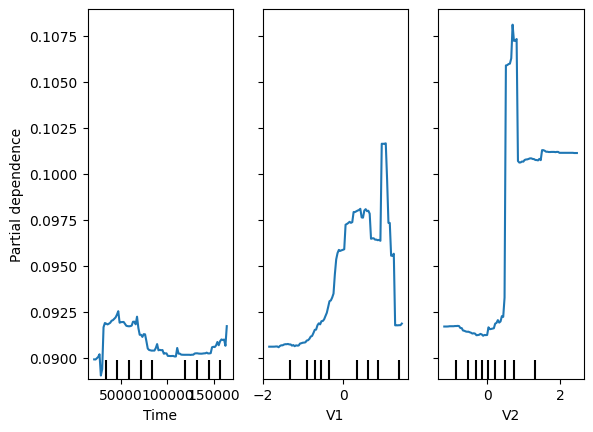

In [24]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(rf, X_resampled, features=[0, 1, 2])  # Change features as needed
plt.show()
